In [1]:
import numpy as np
import pandas as pd

In [7]:
agri_population = pd.read_csv('cleaned_agricultural_population_all.csv')
agri_population.head()

agri_population_zenkoku = agri_population[agri_population['Prefecture'] == '全国']
agri_population_zenkoku.head()

Prefecture  year  Total_Total  Total_15-19  Total_20-24  Total_25-29  \
0           全国  2005      2240672       1306.0      12836.0      23145.0   
48          全国  2010      2051437    1148008.0        658.0       7948.0   
96          全国  2015      1753764    1004716.0        527.0       5440.0   
144         全国  2020      1363038        607.0       4661.0      10796.0   
192         全国  2025      1021192        536.0       3752.0       8318.0   

     Total_30-34  Total_35-39  Total_40-44  Total_45-49  Total_50-54  \
0        30686.0      42490.0      70853.0     110563.0     175100.0   
48       16730.0      21248.0      23808.0      27560.0      40144.0   
96       13716.0      20257.0      24471.0      26547.0      29386.0   
144      20252.0      30219.0      37702.0      43231.0      50169.0   
192      14255.0      24875.0      35252.0      41825.0      46295.0   

     Total_55-59  Total_60-64  Total_65-69  Total_70-74  Total_75+  
0       207089.0     279934.0     391988.0     433158.0   461524.0  
48       59311.0      97173.0     148705.0     161089.0   504821.0  
96       41749.0      63729.0     131669.0     177038.0   418797.0  
144      76733.0     140047.0     252668.0     264193.0   431760.0  
192      52377.0      84018.0     147113.0     213986.0   348590.0

In [8]:
bearDamage = pd.read_csv('cleaned_bear_damage_farm.csv')
bearDamage.head()

Category  Damage_Area_ha  Area_YoY_Change  Damage_Volume_tons  \
0     Bear             1.1              0.0                12.2   
1     Bear             1.1             -0.1                12.0   
2     Bear             2.3              1.3                10.8   
3     Bear             3.2              0.9                12.8   
4     Bear             2.0             -1.2                19.6   

   Volume_YoY_Change  Damage_Amount_1,000,000yen  Amount_YoY_Change  Year  
0               -1.9                       308.0             -156.0  2002  
1               -0.2                       321.0               13.0  2003  
2               -1.2                       410.0               90.0  2004  
3                2.1                       310.0             -100.0  2005  
4                6.7                       764.0              454.0  2006

# Plot Graph to see the relation between agricultural population and damage caused by bear

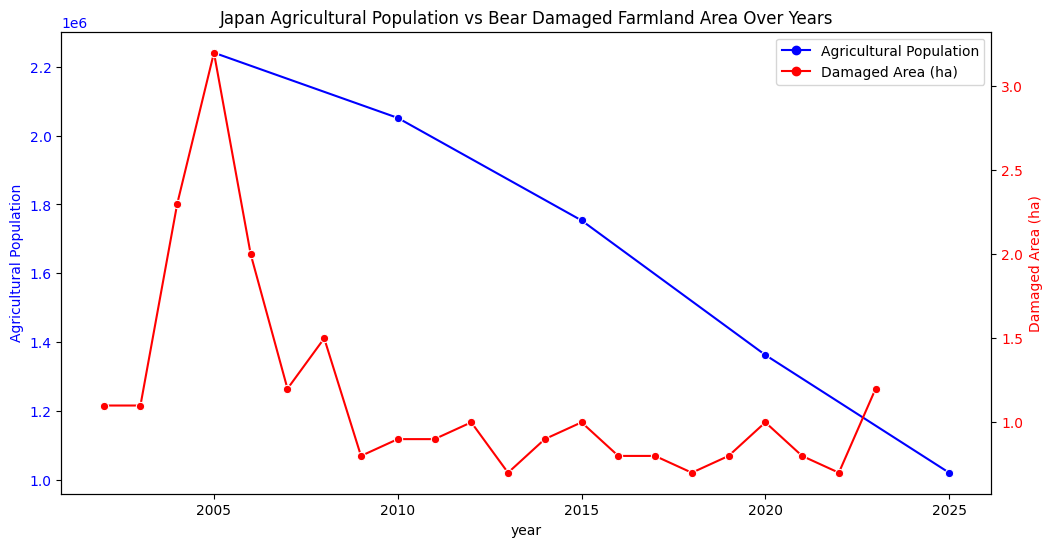

In [43]:
# Plot dual axis line graph to demo relationship between agricultural population and bear damaged farmland area
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data=agri_population_zenkoku, x='year', y='Total_Total', marker='o', ax=ax1, color='b')
ax1.set_ylabel('Agricultural Population', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Japan Agricultural Population vs Bear Damaged Farmland Area Over Years')
ax2 = ax1.twinx()
sns.lineplot(data=bearDamage, x='Year', y='Damage_Area_ha', marker='o', ax=ax2, color='r')
ax2.set_ylabel('Damaged Area (ha)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.legend(handles=[Line2D([], [], marker='o', color='blue', label='Agricultural Population'), Line2D([], [], marker='o', color='red', label='Damaged Area (ha)')])
plt.show()

Can see that there is not a significant relationship between area damaged by bears and the agricultural population of Japan. 

# Analytic Approach

## All Data

In [44]:
# Use intrapolation to fillin the missing agricultural population data for 2005 and 2025

years = pd.Series(range(2005, 2026))
agri_population_interp = agri_population_zenkoku.set_index('year').reindex(years).interpolate().reset_index().rename(columns={'index': 'year'})
agri_population_interp['Prefecture'] = '全国'
agri_population_interp.head()

C:\Users\Ewan\AppData\Local\Temp\ipykernel_26768\3367029540.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  agri_population_interp = agri_population_zenkoku.set_index('year').reindex(years).interpolate().reset_index().rename(columns={'index': 'year'})


year Prefecture  Total_Total  Total_15-19  Total_20-24  Total_25-29  \
0  2005         全国    2240672.0       1306.0      12836.0      23145.0   
1  2006         全国    2202825.0     230646.4      10400.4      20105.6   
2  2007         全国    2164978.0     459986.8       7964.8      17066.2   
3  2008         全国    2127131.0     689327.2       5529.2      14026.8   
4  2009         全国    2089284.0     918667.6       3093.6      10987.4   

   Total_30-34  Total_35-39  Total_40-44  Total_45-49  Total_50-54  \
0      30686.0      42490.0      70853.0     110563.0     175100.0   
1      27894.8      38241.6      61444.0      93962.4     148108.8   
2      25103.6      33993.2      52035.0      77361.8     121117.6   
3      22312.4      29744.8      42626.0      60761.2      94126.4   
4      19521.2      25496.4      33217.0      44160.6      67135.2   

   Total_55-59  Total_60-64  Total_65-69  Total_70-74  Total_75+  
0     207089.0     279934.0     391988.0     433158.0   461524.0  
1     177533.4     243381.8     343331.4     378744.2   470183.4  
2     147977.8     206829.6     294674.8     324330.4   478842.8  
3     118422.2     170277.4     246018.2     269916.6   487502.2  
4      88866.6     133725.2     197361.6     215502.8   496161.6

In [45]:
# Merge the bear damage data with the interpolated agricultural population data
combined = pd.merge(bearDamage, agri_population_interp[['year', 'Total_Total']], left_on='Year', right_on='year', how='inner')
combined.drop(columns=['year'], inplace=True)
combined.head()

Category  Damage_Area_ha  Area_YoY_Change  Damage_Volume_tons  \
0     Bear             3.2              0.9                12.8   
1     Bear             2.0             -1.2                19.6   
2     Bear             1.2             -0.8                12.6   
3     Bear             1.5              0.3                14.0   
4     Bear             0.8             -0.7                16.4   

   Volume_YoY_Change  Damage_Amount_1,000,000yen  Amount_YoY_Change  Year  \
0                2.1                       310.0             -100.0  2005   
1                6.7                       764.0              454.0  2006   
2               -6.9                       337.0             -427.0  2007   
3                1.4                       363.0               25.0  2008   
4                2.4                       336.0              -27.0  2009   

   Total_Total  
0    2240672.0  
1    2202825.0  
2    2164978.0  
3    2127131.0  
4    2089284.0

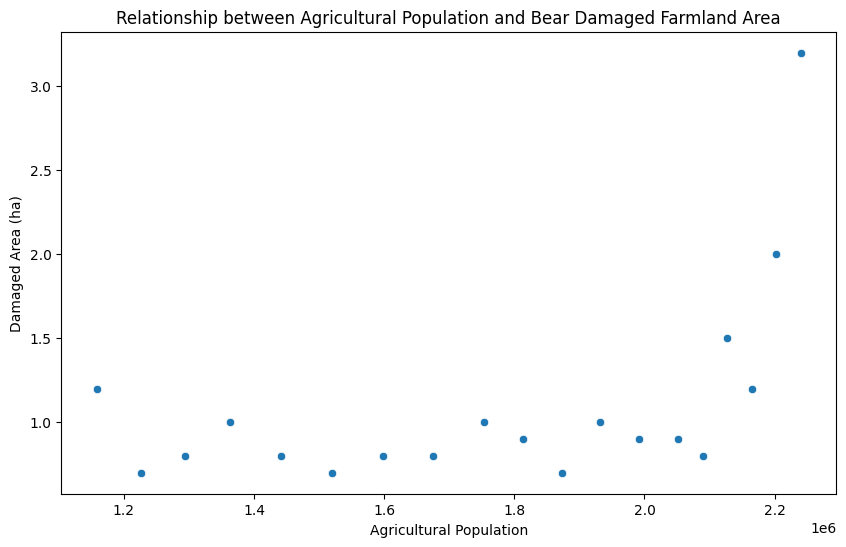

In [47]:
# Scatter plot to show relationship between agricultural population and bear damage area
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined, x='Total_Total', y='Damage_Area_ha')
plt.title('Relationship between Agricultural Population and Bear Damaged Farmland Area')
plt.xlabel('Agricultural Population')
plt.ylabel('Damaged Area (ha)')
plt.show()

From this graph, we can see that there is a significant outlier portion on the right of the graph which represent the data point before 2007.
Thus, in the following, we will try to run one set of analysis with all data and another set with data before 2007 filtered.

### Correlation Coefficient

In [74]:
# Calculate Pearson correlation coefficient between agricultural population and bear damage area
from scipy import stats

combined['Total_1M'] = combined['Total_Total'] / 1000000

x = combined["Total_1M"]
y = combined["Damage_Area_ha"]

r, p_value = stats.pearsonr(x, y)
print(f"Pearson r = {r:.3f}, p = {p_value:.3f}")

Pearson r = 0.504, p = 0.028


In [75]:
# Calculate 95% confidence interval for Pearson r
import numpy as np

n = len(combined)
z = np.arctanh(r)                    # Fisher z‑transform
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)       # for 95% CI

lo = z - z_crit * se
hi = z + z_crit * se
r_lo, r_hi = np.tanh([lo, hi])
print(f"95% CI for r: [{r_lo:.3f}, {r_hi:.3f}]")

95% CI for r: [0.065, 0.780]


The 95% CI of correlation coefficient is >0, indicating there there maybe some degree of linear relationship

### Try to run a linear regression

In [76]:
import statsmodels.api as sm

X = sm.add_constant(x)               # adds intercept term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Area_ha   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     5.797
Date:                Sat, 06 Dec 2025   Prob (F-statistic):             0.0277
Time:                        15:57:18   Log-Likelihood:                -13.953
No. Observations:                  19   AIC:                             31.91
Df Residuals:                      17   BIC:                             33.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4154      0.641     -0.648      0.5

Can see that even though the p-value <0.05, indicating a non-zero corfficient between the agricultural population and bear damaged area, however, can also see that the R-square value is only 0.25 (0.21 for adjusted R-square), indicate that not a significant amount of variance is explained here.


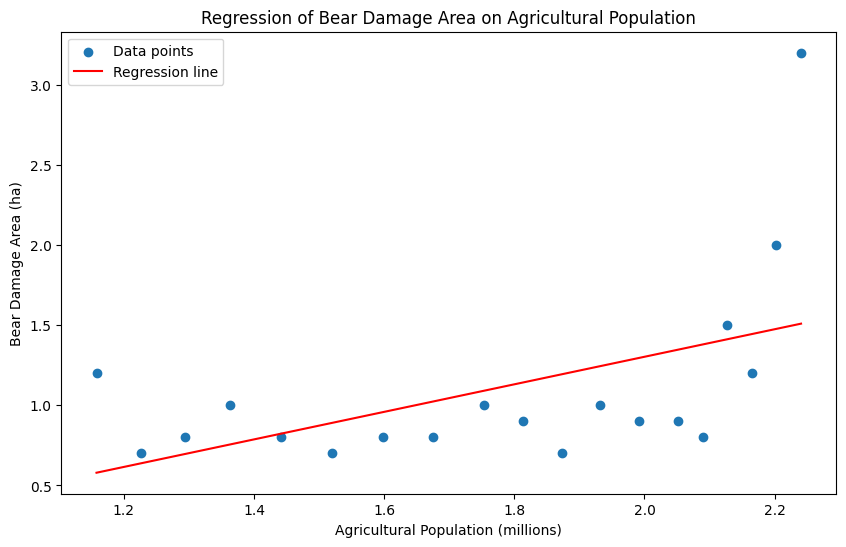

In [77]:
# Plot regression line on the scatter point
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Data points')
plt.plot(x, model.predict(sm.add_constant(x)), color='red', label='Regression line')
plt.xlabel('Agricultural Population (millions)')
plt.ylabel('Bear Damage Area (ha)')
plt.title('Regression of Bear Damage Area on Agricultural Population')
plt.legend()
plt.show()

## Filter out data before 2007

In [78]:
# filter out data before 2006
combined_after2006 = combined[combined['Year'] >= 2007]

### Correlation Coefficient

In [79]:
# Calculate Pearson correlation coefficient between agricultural population and bear damage area
from scipy import stats

combined_after2006['Total_1M'] = combined_after2006['Total_Total'] / 1000000

x = combined_after2006["Total_1M"]
y = combined_after2006["Damage_Area_ha"]

r, p_value = stats.pearsonr(x, y)
print(f"Pearson r = {r:.3f}, p = {p_value:.3f}")

Pearson r = 0.318, p = 0.214


C:\Users\Ewan\AppData\Local\Temp\ipykernel_26768\53752518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_after2006['Total_1M'] = combined_after2006['Total_Total'] / 1000000


In [80]:
# Calculate 95% confidence interval for Pearson r
import numpy as np

n = len(combined_after2006)
z = np.arctanh(r)                    # Fisher z‑transform
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)       # for 95% CI

lo = z - z_crit * se
hi = z + z_crit * se
r_lo, r_hi = np.tanh([lo, hi])
print(f"95% CI for r: [{r_lo:.3f}, {r_hi:.3f}]")

95% CI for r: [-0.192, 0.693]


Can see that the p-value is 0.214 and the 95% confident interval include 0, thus we cannot reject the null hypothesis that actually there is no correlation between agricultral population and bear damage

### Try to run a linear regression

In [83]:
import statsmodels.api as sm

X = sm.add_constant(x)               # adds intercept term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Area_ha   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.683
Date:                Sat, 06 Dec 2025   Prob (F-statistic):              0.214
Time:                        16:03:55   Log-Likelihood:                 3.5323
No. Observations:                  17   AIC:                            -3.065
Df Residuals:                      15   BIC:                            -1.398
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5740      0.274      2.093      0.0

Again, we can see as the p-value for the variable is 0.214, indicating that we cannot reject the null hypothesis that there is not a relationship between agricultural population and damage caused by bear.

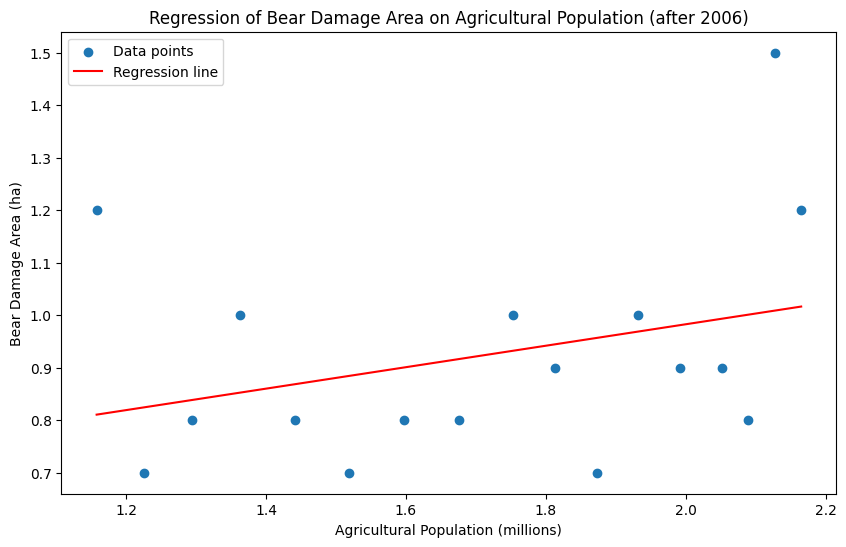

In [84]:
# Plot regression line on the scatter point
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Data points')
plt.plot(x, model.predict(sm.add_constant(x)), color='red', label='Regression line')
plt.xlabel('Agricultural Population (millions)')
plt.ylabel('Bear Damage Area (ha)')
plt.title('Regression of Bear Damage Area on Agricultural Population (after 2006)')
plt.legend()
plt.show()

# Conclusion

In conclusion, from the line graph and scatter plot, we observed that there is not a strong visual evidence that there is a linear relationship between agricultural population and damage caused by bear. 

However, when we analyse the data with full data set, the statistics tell us that the relationship somewhat existed even though agricultural population alone is not enough to explain the variance in damage caused by bears, making it at most a secondary factor.

But as we can see from the line graph and scatter plot, there is some outlier values before 2007, and when we remove the outlier and run the analysis again, this time the result is opposite.

The analysis suggesting that there is weak or no simple linear association between agricultural population and damage caused by bear, hence we can reasonably concluded that bear damage and agricultural population are not meaningfully related from this dataset.

(Note that we used farmland damaged by bear as a indicator for bear population as we assumed that higher bear population is correlated to farmland damaged by bear)